
1. **Pixel value**
    1. 객체 영역(bbox) 평균 pixel value
    2. 객체 영역을 제외한 배경(background) 평균 pixel value


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import json

In [2]:
data = pd.read_csv('../data(05_19).csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58062 entries, 0 to 58061
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   imagePath  58062 non-null  object 
 1   label      58062 non-null  object 
 2   Shape_num  58062 non-null  int64  
 3   point1_x   58062 non-null  float64
 4   point1_y   58062 non-null  float64
 5   point2_x   58062 non-null  float64
 6   point2_y   58062 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.1+ MB


In [4]:
data.values[0]

array(['3403540', 'pack', 1, 926.446624, 1682.1, 1247.866464, 2283.751008],
      dtype=object)

In [3]:
path = "E:/reusable-trash-images/selectstar-reusable-trash-image/"
image_path = path + data.values[0][0] + ".jpg"
print(image_path,data.values[0][0])
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


E:/reusable-trash-images/selectstar-reusable-trash-image/3403540.jpg 3403540


In [4]:
image.shape

(4032, 2272, 3)

### bbox-pixel-mean

926 1682 1247 2283
(601, 321, 3)


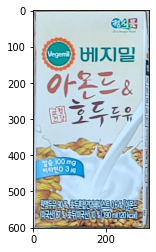

In [33]:
x = int(data.values[0][3])
y = int(data.values[0][4])
w = int(data.values[0][5])
h = int(data.values[0][6])
temp = image[y:h,x:w]
print(x,y,w,h)
print(temp.shape)
plt.imshow(temp)
plt.show()

In [15]:
temp = temp.reshape(temp.shape[0]*temp.shape[1],3)
temp.shape

(192921, 3)

In [23]:
np.average(temp,axis=0).round().astype(np.int32)

array([173, 191, 198])

In [153]:
image.shape

(4032, 2272, 3)

In [245]:
image[0][0]

array([172, 169, 164], dtype=uint8)

In [285]:
image[y:h,x:w]=-1

np.average(image[image[:,:,:]!=255].reshape(-1,3),axis=0).round().astype(np.int32)

array([169, 164, 158])

In [124]:
print((w-x)*(h-y))

192921


In [3]:
error_list = []

In [7]:
bBoxMeanR = []
bBoxMeanG = []
bBoxMeanB = []
eBoxMeanR = []
eBoxMeanG = []
eBoxMeanB = []
for i in range(25001,30001):
    try:
        path = "E:/reusable-trash-images/selectstar-reusable-trash-image/"
        image_path = path + data.values[i][0] + ".jpg"
        print(f"{i}번째")
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        x = int(data.values[0][3])
        y = int(data.values[0][4])
        w = int(data.values[0][5])
        h = int(data.values[0][6])
        roi = image[y:h,x:w]
        roi = roi.reshape(roi.shape[0]*roi.shape[1],3)
        temp = np.average(roi,axis=0).round().astype(np.int32)
        image[y:h,x:w]=256
        e_temp = np.average(image[image[:,:,:]!=256].reshape(-1,3),axis=0).round().astype(np.int32)
        bBoxMeanR.append(temp[0])
        bBoxMeanG.append(temp[1])
        bBoxMeanB.append(temp[2])
        eBoxMeanR.append(e_temp[0])
        eBoxMeanG.append(e_temp[1])
        eBoxMeanB.append(e_temp[2])
    except:
        error_list.append(data.values[i][0])

25001번째
25002번째
25003번째
25004번째
25005번째
25006번째
25007번째
25008번째
25009번째
25010번째
25011번째
25012번째
25013번째
25014번째
25015번째
25016번째
25017번째
25018번째
25019번째
25020번째
25021번째
25022번째
25023번째
25024번째
25025번째
25026번째
25027번째
25028번째
25029번째
25030번째
25031번째
25032번째
25033번째
25034번째
25035번째
25036번째
25037번째
25038번째
25039번째
25040번째
25041번째
25042번째
25043번째
25044번째
25045번째
25046번째
25047번째
25048번째
25049번째
25050번째
25051번째
25052번째
25053번째
25054번째
25055번째
25056번째
25057번째
25058번째
25059번째
25060번째
25061번째
25062번째
25063번째
25064번째
25065번째
25066번째
25067번째
25068번째
25069번째
25070번째
25071번째
25072번째
25073번째
25074번째
25075번째
25076번째
25077번째
25078번째
25079번째
25080번째
25081번째
25082번째
25083번째
25084번째
25085번째
25086번째
25087번째
25088번째
25089번째
25090번째
25091번째
25092번째
25093번째
25094번째
25095번째
25096번째
25097번째
25098번째
25099번째
25100번째
25101번째
25102번째
25103번째
25104번째
25105번째
25106번째
25107번째
25108번째
25109번째
25110번째
25111번째
25112번째
25113번째
25114번째
25115번째
25116번째
25117번째
25118번째
25119번째
25120번째
25121번째
25122번째
25123번째
25124번째
25125번째


In [ ]:
print(len(bBoxMeanR))
print(len(bBoxMeanG))
print(len(bBoxMeanB))
print(len(eBoxMeanR))
print(len(eBoxMeanG))
print(len(eBoxMeanB))

5000
5000
5000
5000
5000
5000


In [ ]:
df_temp = pd.DataFrame({
    "bBoxMeanR":bBoxMeanR,
    "bBoxMeanG":bBoxMeanG,
    "bBoxMeanB":bBoxMeanB,
    "eBoxMeanR":eBoxMeanR,
    "eBoxMeanG":eBoxMeanG,    
    "eBoxMeanB":eBoxMeanB,
    })
df_temp.to_csv("./box12.csv", index=False)


In [378]:
data_test = pd.read_csv("./box10.csv")
data_test

,bBoxMeanR,bBoxMeanG,bBoxMeanB,eBoxMeanR,eBoxMeanG,eBoxMeanB
0,108,125,96,140,120,103
1,164,159,157,157,155,153
2,170,167,170,138,138,137
3,170,167,170,138,138,137
4,147,103,100,118,119,115
...,...,...,...,...,...,...
4995,153,146,125,165,162,159
4996,153,146,125,165,162,159
4997,153,146,125,165,162,159
4998,156,150,120,156,153,149
